# CREDIT CARD FRAUD DETECTION
(Deep learning method)

In [1]:
import platform; print(platform.platform())
import sys; print("Python", sys.version)
import numpy; print("NumPy", numpy.__version__)
import scipy; print("SciPy", scipy.__version__)
import sklearn; print("Scikit-Learn", sklearn.__version__)

Darwin-18.2.0-x86_64-i386-64bit
Python 3.6.8 |Anaconda, Inc.| (default, Dec 29 2018, 19:04:46) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
NumPy 1.15.4
SciPy 1.2.0
Scikit-Learn 0.20.2


In [2]:
import pandas as pd
import numpy as np
import keras

np.random.seed(2)

/Users/anubhavgupta/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
data = pd.read_csv('creditcard.csv')

## Data exploration

In [4]:
data.shape

(284807, 31)

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Pre-processing

In [6]:
# normalizing the values of a column 
from sklearn.preprocessing import StandardScaler
data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
# dropping Amount column as we do not need it now
data = data.drop(['Amount'],axis=1)

In [7]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [8]:
data = data.drop(['Time'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [9]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [10]:
X.shape

(284807, 29)

In [11]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


## Splitting data into training dataset and testing dataset

(To divide validation for small data, so that it can proceed faster)

In [12]:
# supervised learning, expected output is assumed, to validate it with our result with each iteration
# scikit learn functions are used to do splitting
# from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [13]:
X_train.shape

(199364, 29)

In [14]:
X_test.shape
# X_test, 30% of total dataset

(85443, 29)

In [15]:
y_train.shape
#y_train 

(199364, 1)

In [16]:
y_test.shape

(85443, 1)

In [17]:
# now transforming datasets into numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

## Deep neural network
(It will help us to predict if a new transaction is fraudulent or not)

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [19]:
# using relu and sigmoid activation functions
# layers
model = Sequential([
    Dense(units=16, input_dim = 29,activation='relu'), # 16 nodes initially
    Dense(units=24,activation='relu'),   # increased to 24 nodes
    Dropout(0.5),                        # 0.5 probability of dropping each node
    Dense(20,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid'), # probability node 1 final output # because of binary classification problem 
])

## Training
Remember training a network means finding the best set of weights to make predictions for this problem.
In this case, we will use logarithmic loss, which for a binary classification problem is defined in Keras as “binary_crossentropy“.
We will also use the efficient gradient descent algorithm “adam” for no other reason that it is an efficient default.

In [21]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


#The training process will run for a fixed number of iterations through the dataset called epochs
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
199364/199364 [==============================] - 30s 152us/step - loss: 0.0104 - acc: 0.9979
Epoch 2/5
199364/199364 [==============================] - 28s 141us/step - loss: 0.0040 - acc: 0.9993
Epoch 3/5
199364/199364 [==============================] - 30s 150us/step - loss: 0.0037 - acc: 0.9993
Epoch 4/5
199364/199364 [==============================] - 29s 148us/step - loss: 0.0035 - acc: 0.9994
Epoch 5/5
199364/199364 [==============================] - 28s 142us/step - loss: 0.0032 - acc: 0.9994


In [22]:
score = model.evaluate(X_test, y_test)   

85443/85443 [==============================] - 2s 21us/step


In [23]:
print(score)

[0.004807295805938603, 0.9993914071369217]


In [24]:
import matplotlib.pyplot as plt
import itertools

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix, classification_report

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [25]:
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)

In [26]:
cnf_matrix = confusion_matrix(y_test, y_pred.round())

In [27]:
print(cnf_matrix)

[[85281    15]
 [   37   110]]


Confusion matrix, without normalization
[[85281    15]
 [   37   110]]


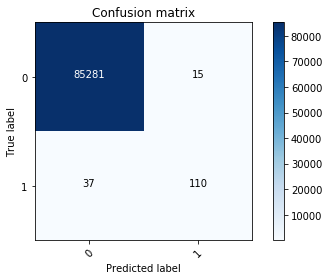

In [28]:
plot_confusion_matrix(cnf_matrix, classes=[0,1])

In [29]:
plt.show()

Confusion matrix, without normalization
[[284259     56]
 [   136    356]]


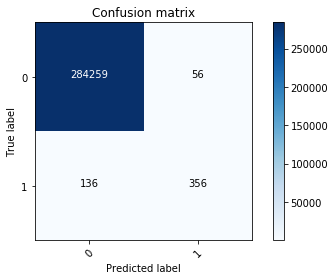

In [30]:
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

## SMOTE

In [43]:
%%bash
pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in /Users/anubhavgupta/anaconda3/lib/python3.6/site-packages (0.4.3)


You are using pip version 19.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [44]:
from imblearn.over_sampling import SMOTE

In [45]:
X_resample, y_resample = SMOTE().fit_sample(X,y.values.ravel())

In [46]:
y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample,test_size=0.3)

In [48]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [49]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
398041/398041 [==============================] - 69s 173us/step - loss: 0.0310 - acc: 0.9896
Epoch 2/5
398041/398041 [==============================] - 68s 170us/step - loss: 0.0133 - acc: 0.9966
Epoch 3/5
398041/398041 [==============================] - 59s 149us/step - loss: 0.0108 - acc: 0.9975
Epoch 4/5
398041/398041 [==============================] - 55s 139us/step - loss: 0.0097 - acc: 0.9977
Epoch 5/5
398041/398041 [==============================] - 54s 137us/step - loss: 0.0090 - acc: 0.9979


Confusion matrix, without normalization
[[85076   238]
 [   68 85207]]


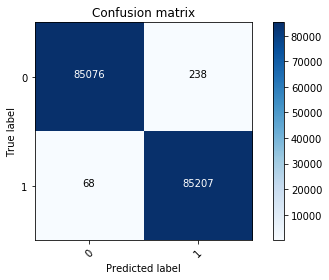

In [50]:
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()
print(classification_report(y_test,y_pred))

Confusion matrix, without normalization
[[283585    730]
 [     5    487]]


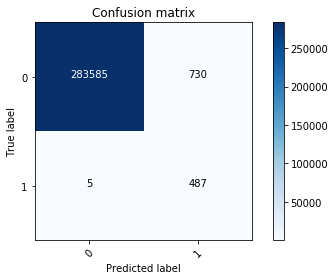

In [53]:
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

In [56]:
print(classification_report(y_expected, y_pred.round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.40      0.99      0.57       492

   micro avg       1.00      1.00      1.00    284807
   macro avg       0.70      0.99      0.78    284807
weighted avg       1.00      1.00      1.00    284807

